In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from folium import plugins
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv('M20_P19_ElectionData.csv')
df

TimeElapsed                 time        territoryName  totalMandates  \
0                0  2019-10-06 20:10:02  Território Nacional              0   
1                0  2019-10-06 20:10:02  Território Nacional              0   
2                0  2019-10-06 20:10:02  Território Nacional              0   
3                0  2019-10-06 20:10:02  Território Nacional              0   
4                0  2019-10-06 20:10:02  Território Nacional              0   
...            ...                  ...                  ...            ...   
21638          265  2019-10-07 00:35:01                Viseu              8   
21639          265  2019-10-07 00:35:01                Viseu              8   
21640          265  2019-10-07 00:35:01                Viseu              8   
21641          265  2019-10-07 00:35:01                Viseu              8   
21642          265  2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...    

In [3]:
df.territoryName.value_counts()

Território Nacional    1134
Leiria                 1134
Braga                  1134
Porto                  1134
Viana do Castelo       1080
Viseu                  1080
Coimbra                1080
Lisboa                 1080
Madeira                1080
Setúbal                1080
Aveiro                 1080
Faro                   1026
Santarém               1026
Évora                  1026
Guarda                 1026
Castelo Branco          972
Bragança                972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [4]:
df.Party.value_counts()

PCP-PEV      1127
CH           1127
A            1127
PNR          1127
CDS-PP       1127
PS           1127
PDR          1127
B.E.         1127
IL           1127
L            1127
PCTP/MRPP    1127
PAN          1127
PPD/PSD      1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

here we can see All party counts

In [5]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

No null data present in given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [7]:
df['time']=pd.to_datetime(df['time'])

we changed time into datetime data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [9]:
df

TimeElapsed                time        territoryName  totalMandates  \
0                0 2019-10-06 20:10:02  Território Nacional              0   
1                0 2019-10-06 20:10:02  Território Nacional              0   
2                0 2019-10-06 20:10:02  Território Nacional              0   
3                0 2019-10-06 20:10:02  Território Nacional              0   
4                0 2019-10-06 20:10:02  Território Nacional              0   
...            ...                 ...                  ...            ...   
21638          265 2019-10-07 00:35:01                Viseu              8   
21639          265 2019-10-07 00:35:01                Viseu              8   
21640          265 2019-10-07 00:35:01                Viseu              8   
21641          265 2019-10-07 00:35:01                Viseu              8   
21642          265 2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...     ...    ... 

In [10]:
df.describe().T

count           mean           std      min  \
TimeElapsed               21643.0     133.146052  7.765119e+01     0.00   
totalMandates             21643.0      11.544795  3.131457e+01     0.00   
availableMandates         21643.0      11.499284  3.173878e+01     0.00   
numParishes               21643.0     309.956013  6.590559e+02    54.00   
numParishesApproved       21643.0     261.090237  5.833774e+02     3.00   
blankVotes                21643.0    8875.066673  2.148487e+04    19.00   
blankVotesPercentage      21643.0       2.621629  7.952894e-01     0.53   
nullVotes                 21643.0    6148.068752  1.473547e+04    39.00   
nullVotesPercentage       21643.0       1.961471  3.752501e-01     1.34   
votersPercentage          21643.0      51.983722  4.854380e+00    35.98   
subscribedVoters          21643.0  627536.747771  1.525590e+06  5767.00   
totalVoters               21643.0  339074.055353  8.290404e+05  2833.00   
pre.blankVotes            21643.0    7608.001386  1.849311e+04    32.00   
pre.blankVotesPercentage  21643.0       2.071985  5.180250e-01     0.80   
pre.nullVotes             21643.0    5914.629950  1.423604e+04    40.00   
pre.nullVotesPercentage   21643.0       1.777442  3.887976e-01     1.14   
pre.votersPercentage      21643.0      54.549372  4.964948e+00    40.87   
pre.subscribedVoters      21643.0  637850.305826  1.544418e+06  6383.00   
pre.totalVoters           21643.0  359493.176223  8.763729e+05  3215.00   
Mandates                  21643.0       0.565495  4.421804e+00     0.00   
Percentage                21643.0       4.968484  1.037997e+01     0.02   
validVotesPercentage      21643.0       5.207232  1.088111e+01     0.02   
Votes                     21643.0   15852.090098  9.310605e+04     1.00   
Hondt                     21643.0       1.126138  6.293552e+00     0.00   
FinalMandates             21643.0       1.126138  6.872644e+00     0.00   

                                25%        50%        75%         max  
TimeElapsed                   65.00     135.00     200.00      265.00  
totalMandates                  1.00       4.00       9.00      226.00  
availableMandates              0.00       3.00       9.00      226.00  
numParishes                   75.00     147.00     242.00     3092.00  
numParishesApproved           67.00     120.00     208.00     3092.00  
blankVotes                  1188.00    2998.00    6889.00   129599.00  
blankVotesPercentage           2.23       2.64       2.98        5.46  
nullVotes                   1094.00    2232.00    4121.00    88539.00  
nullVotesPercentage            1.72       1.87       2.23        3.35  
votersPercentage              50.29      53.13      54.55       59.87  
subscribedVoters          122987.00  228954.00  380489.00  9343084.00  
totalVoters                62671.00  106012.00  206918.00  5092424.00  
pre.blankVotes              1130.00    2595.00    5929.00   112666.00  
pre.blankVotesPercentage       1.74       2.03       2.37        3.66  
pre.nullVotes               1124.00    2141.00    3967.00    86473.00  
pre.nullVotesPercentage        1.52       1.69       1.97        3.12  
pre.votersPercentage          51.21      56.26      58.22       62.58  
pre.subscribedVoters      128926.00  228497.00  393314.00  9439701.00  
pre.totalVoters            69644.00  110273.00  227620.00  5380451.00  
Mandates                       0.00       0.00       0.00      106.00  
Percentage                     0.22       0.62       3.01       49.11  
validVotesPercentage           0.23       0.65       3.16       51.42  
Votes                        236.00     790.00    4510.00  1866407.00  
Hondt                          0.00       0.00       0.00       94.00  
FinalMandates                  0.00       0.00       0.00      106.00

In [11]:
df.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

we can see the mean here for all attributes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

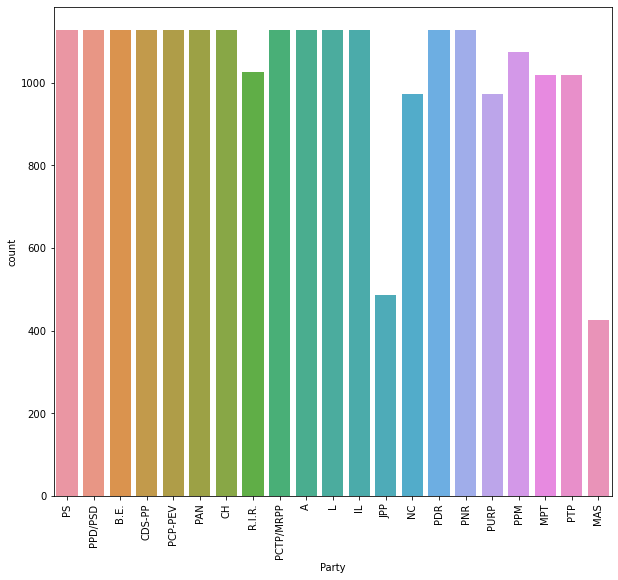

In [12]:
plt.figure(figsize=(10,9))
sns.countplot(df.Party)
plt.xticks(rotation=90)

we can see party count visualisation here

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

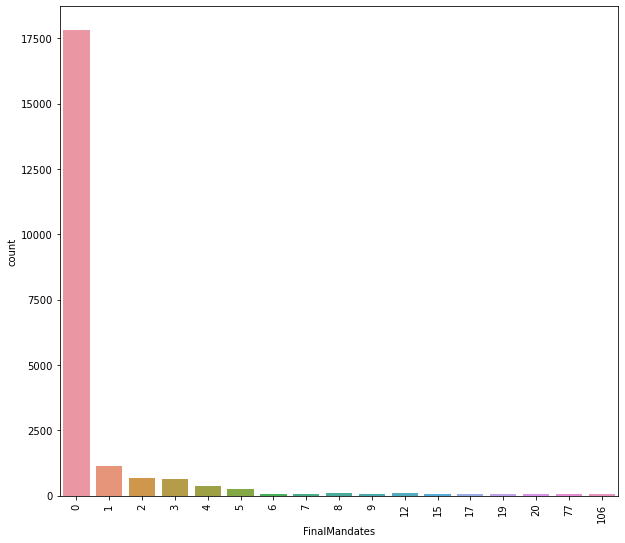

In [13]:
plt.figure(figsize=(10,9))
sns.countplot(df.FinalMandates)
plt.xticks(rotation=90)

we can see the Final Mandates counts here

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

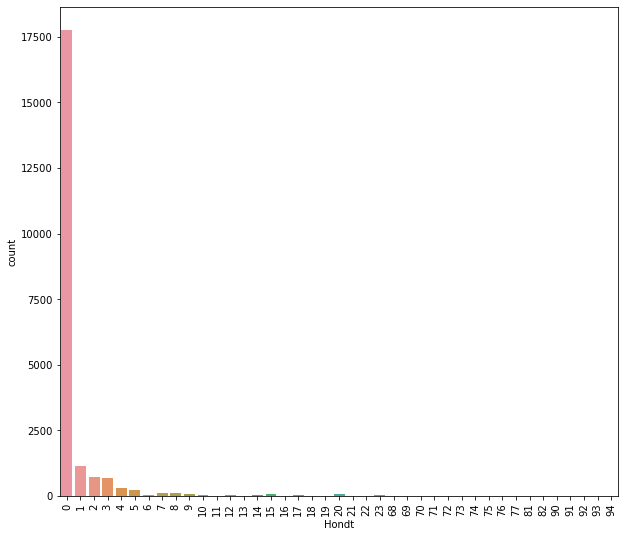

In [14]:
plt.figure(figsize=(10,9))
sns.countplot(df.Hondt)
plt.xticks(rotation=90)

we can ssee Hondt count here

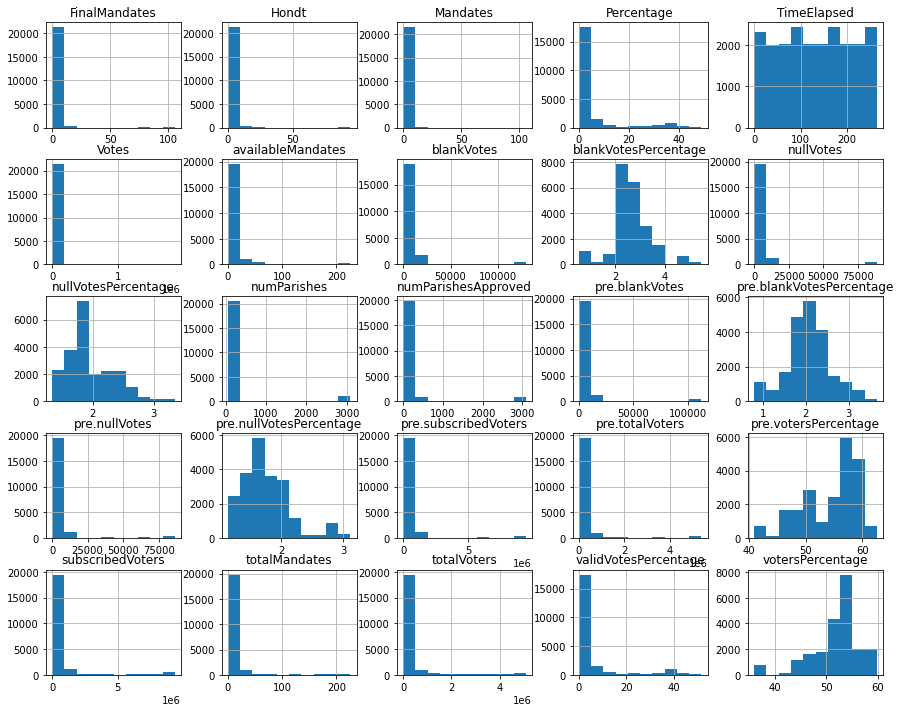

In [15]:
df.hist(figsize=(15,12));

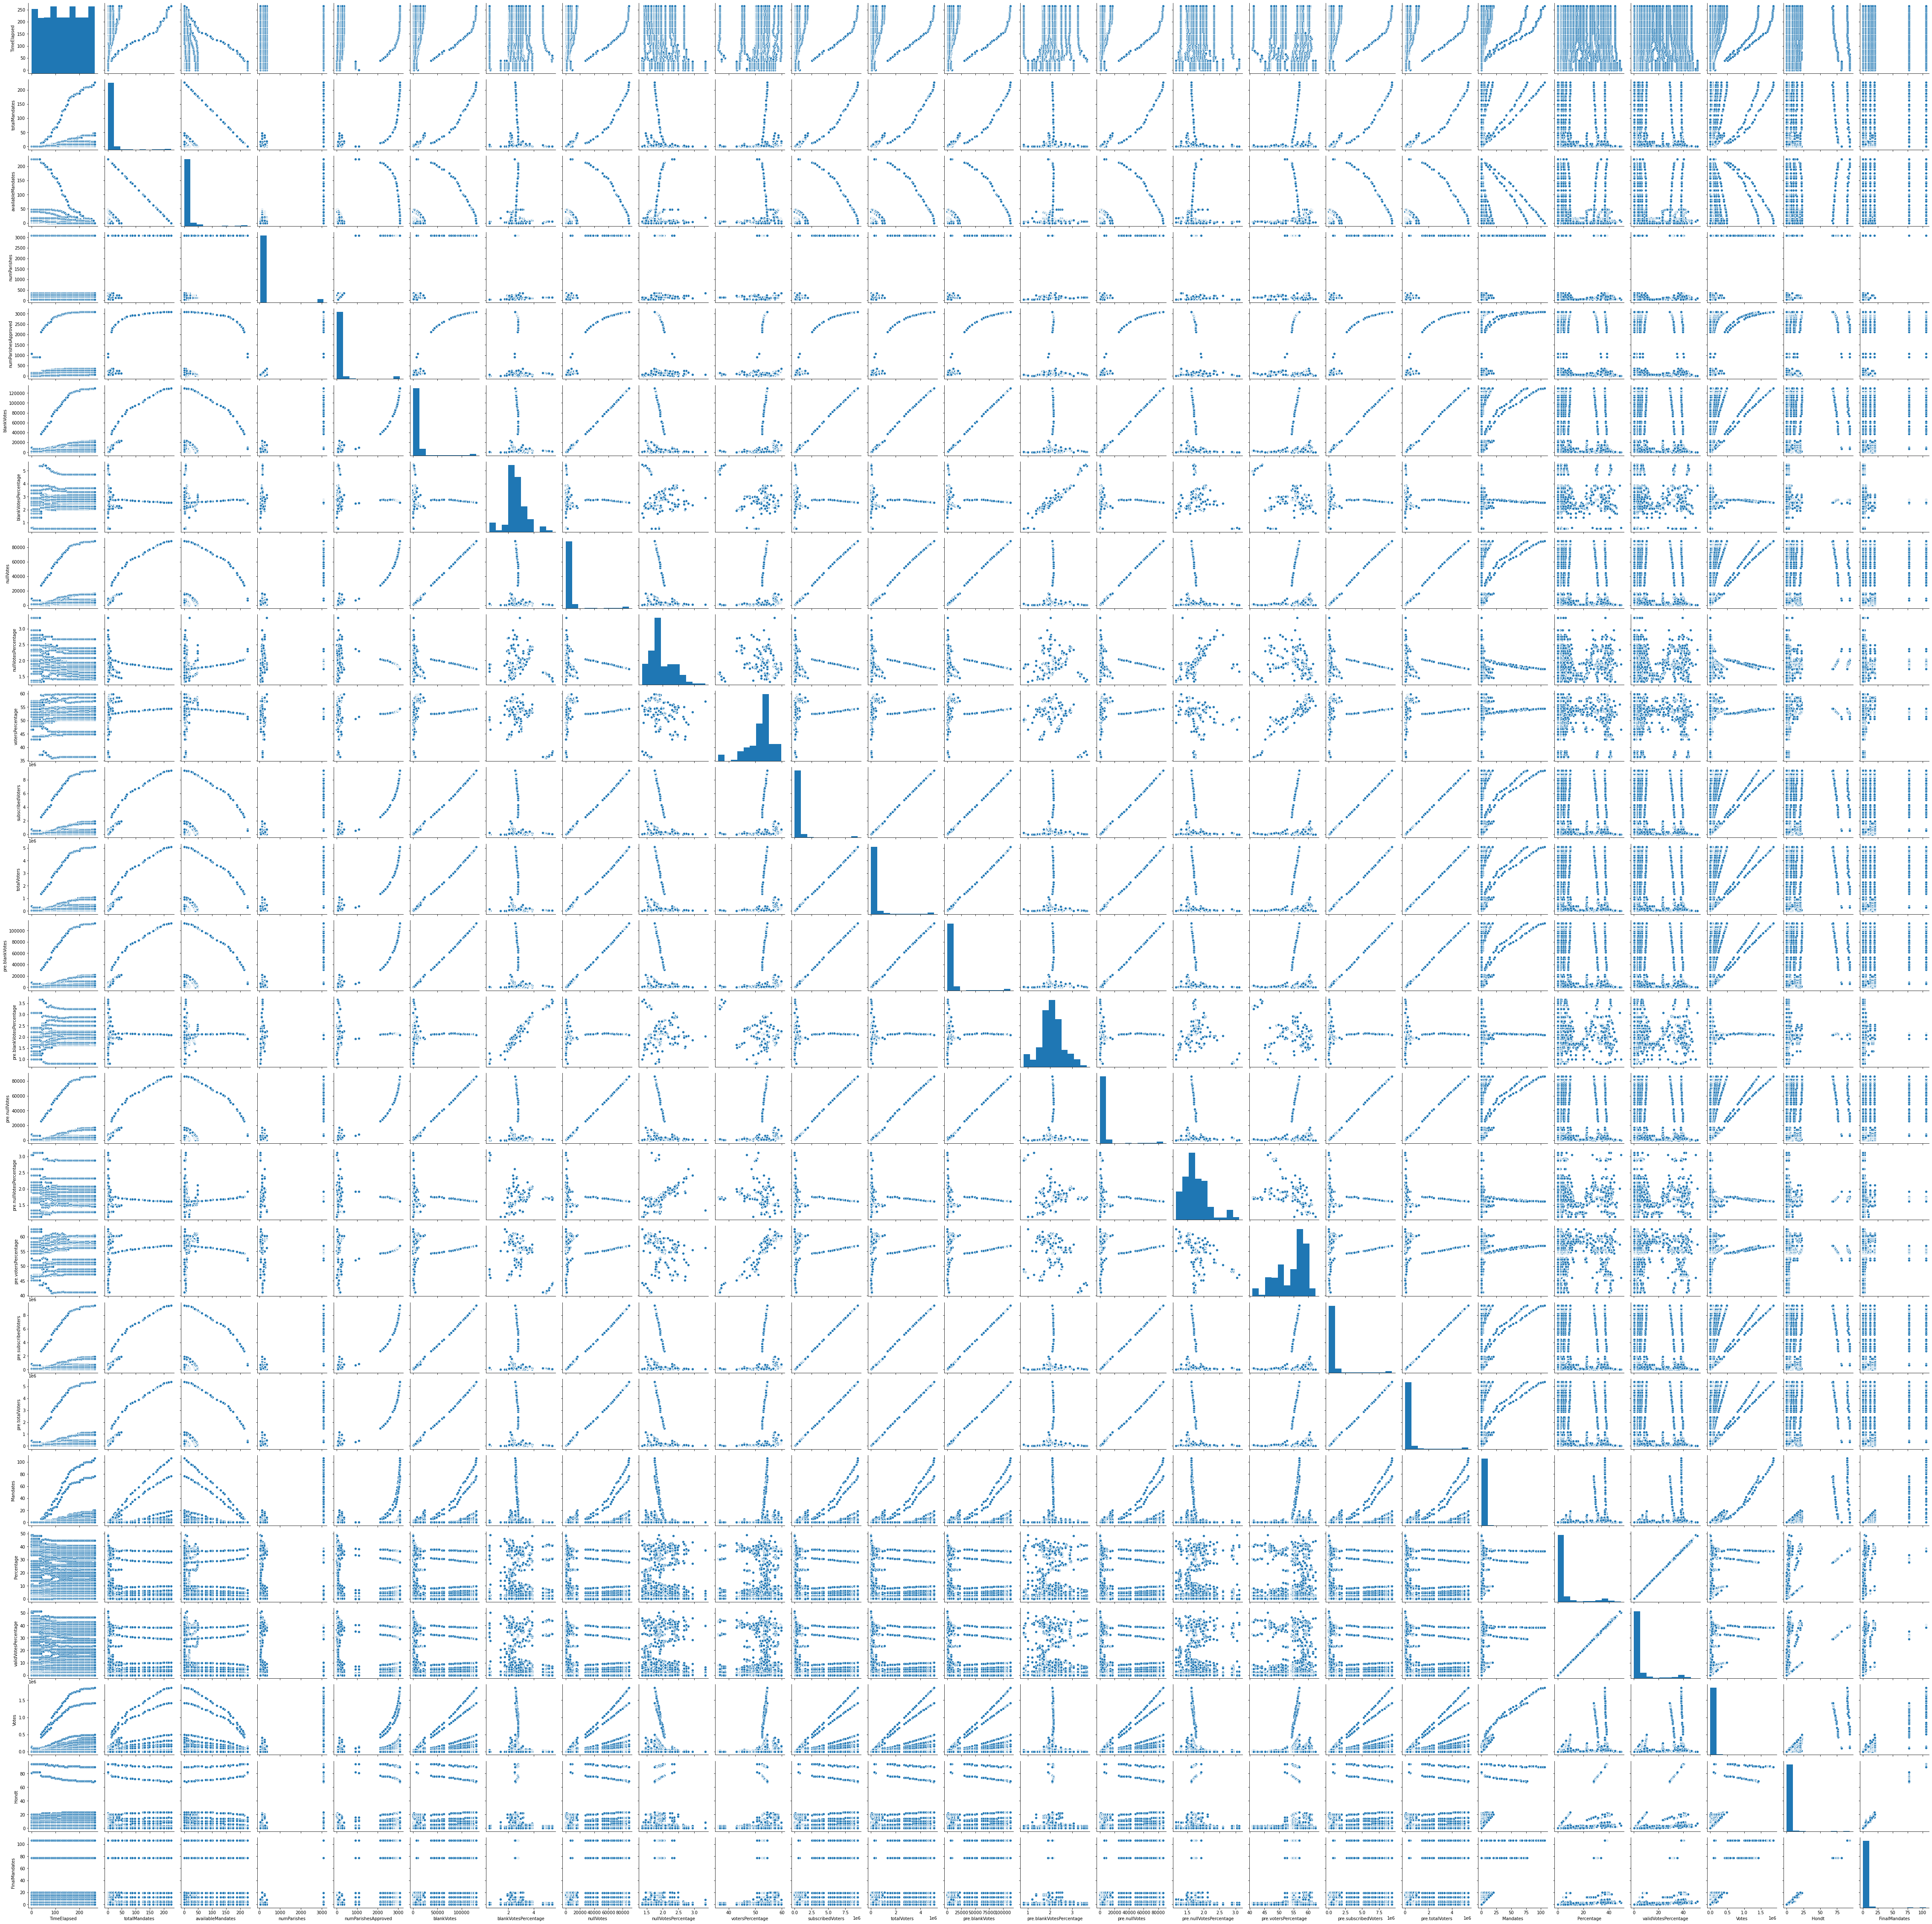

In [16]:
sns.pairplot(df)

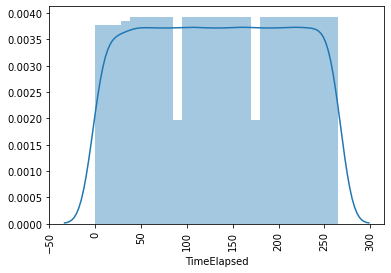

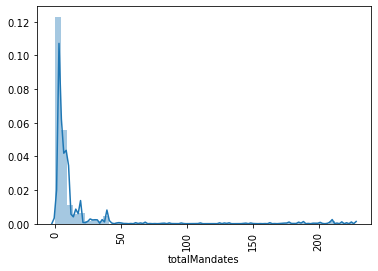

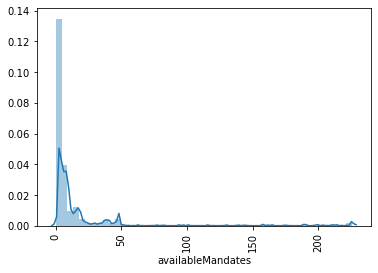

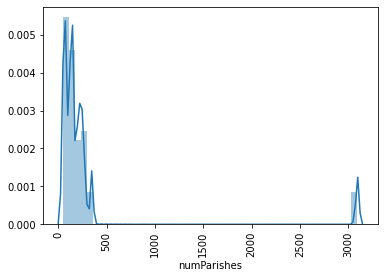

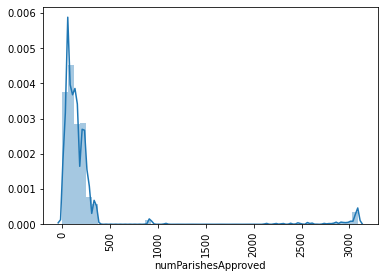

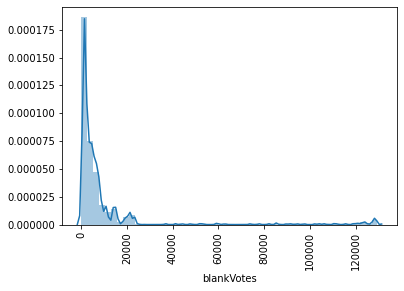

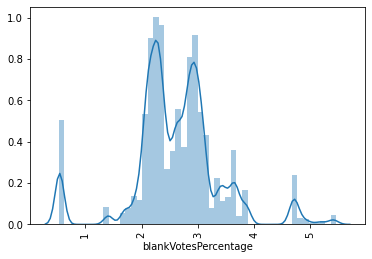

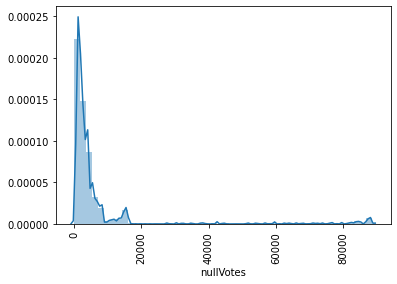

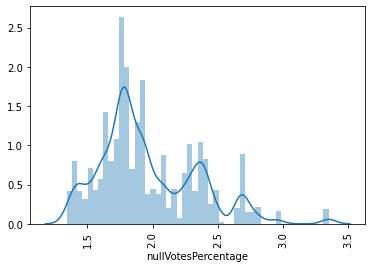

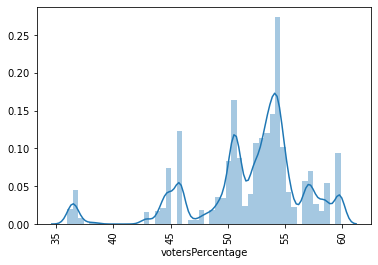

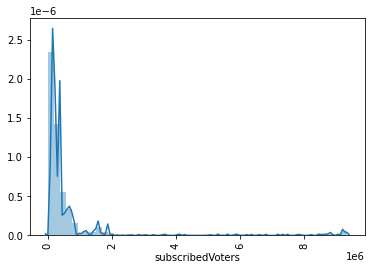

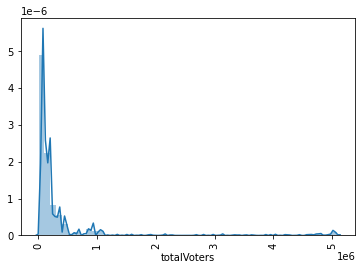

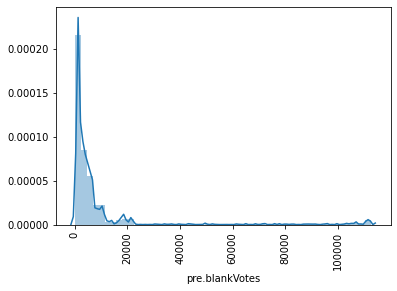

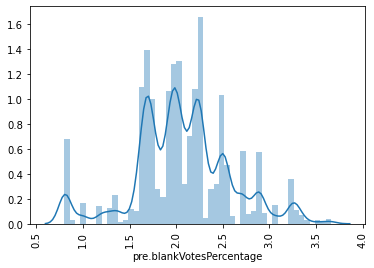

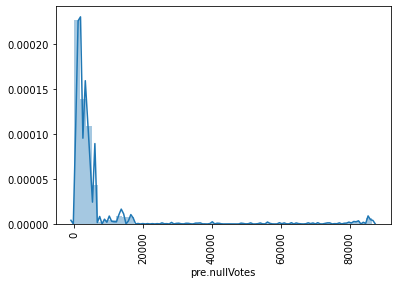

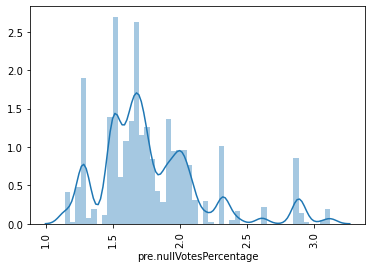

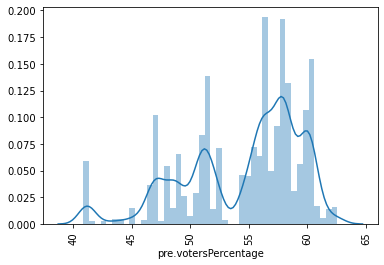

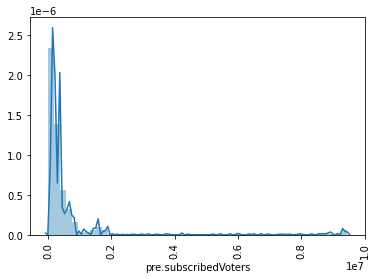

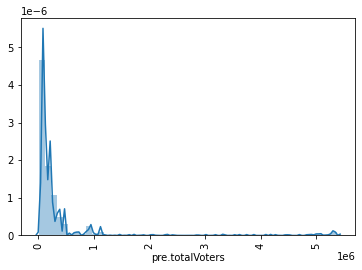

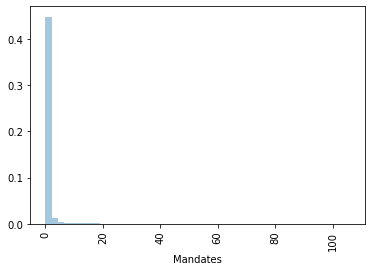

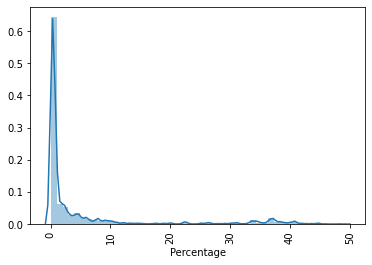

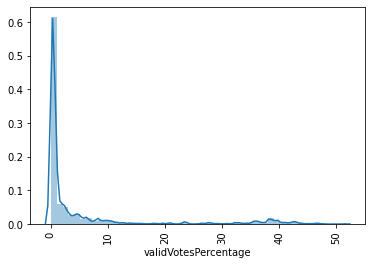

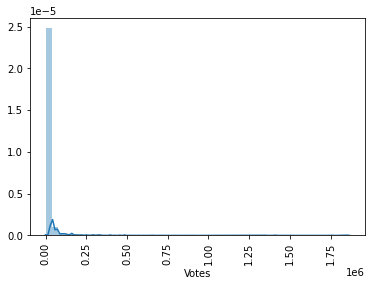

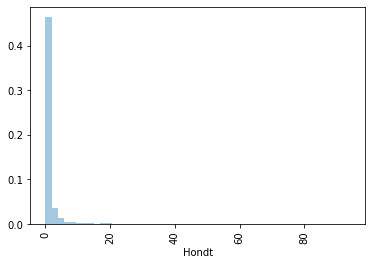

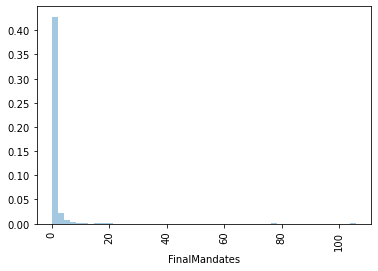

In [17]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

we can easily look for skewness here  for each data set

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

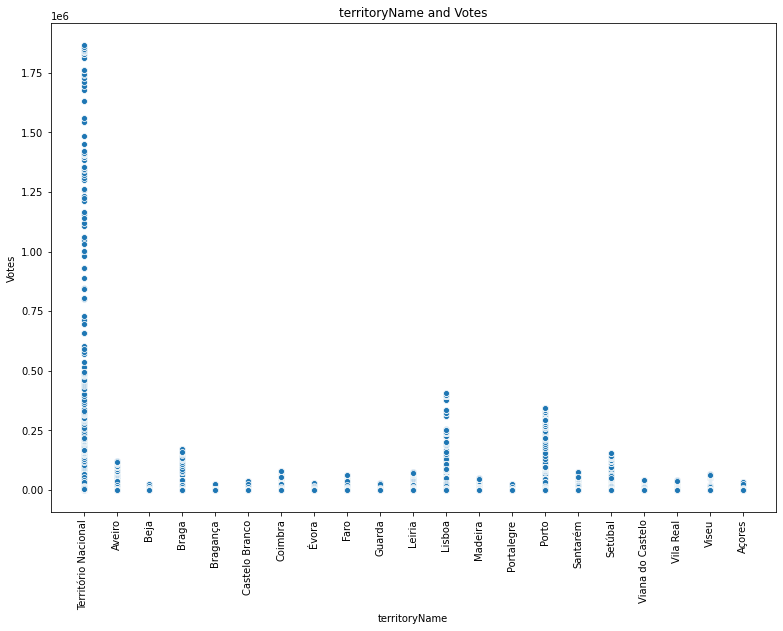

In [18]:
plt.figure(figsize=(13,9))
plt.xlabel('territoryName')
plt.ylabel('Votes')
plt.title('territoryName and Votes')
sns.scatterplot(x='territoryName',y='Votes',data=df)
plt.xticks(rotation=90)

we can see in this scatter graph votes with respect to territory

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

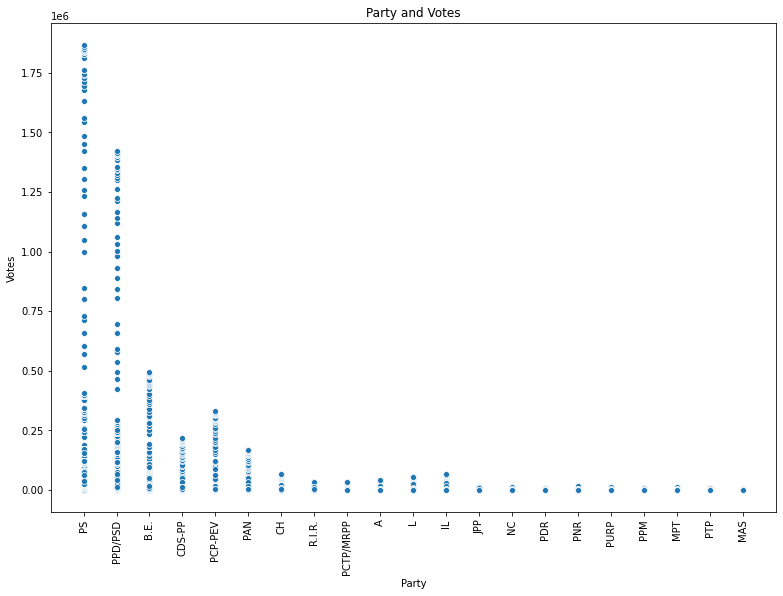

In [19]:
plt.figure(figsize=(13,9))
plt.xlabel('Party')
plt.ylabel('Votes')
plt.title('Party and Votes')
sns.scatterplot(x='Party',y='Votes',data=df)
plt.xticks(rotation=90)

we can see in this scatter graph votes with respect to party

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

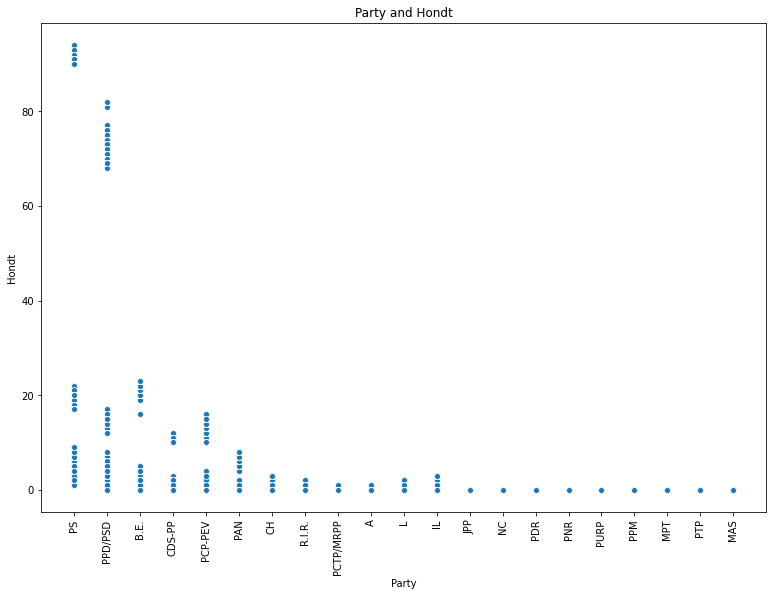

In [20]:
plt.figure(figsize=(13,9))
plt.xlabel('Party')
plt.ylabel('Hondt')
plt.title('Party and Hondt')
sns.scatterplot(x='Party',y='Hondt',data=df)
plt.xticks(rotation=90)

we can see in this scatter graph Hodnt with respect to party

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

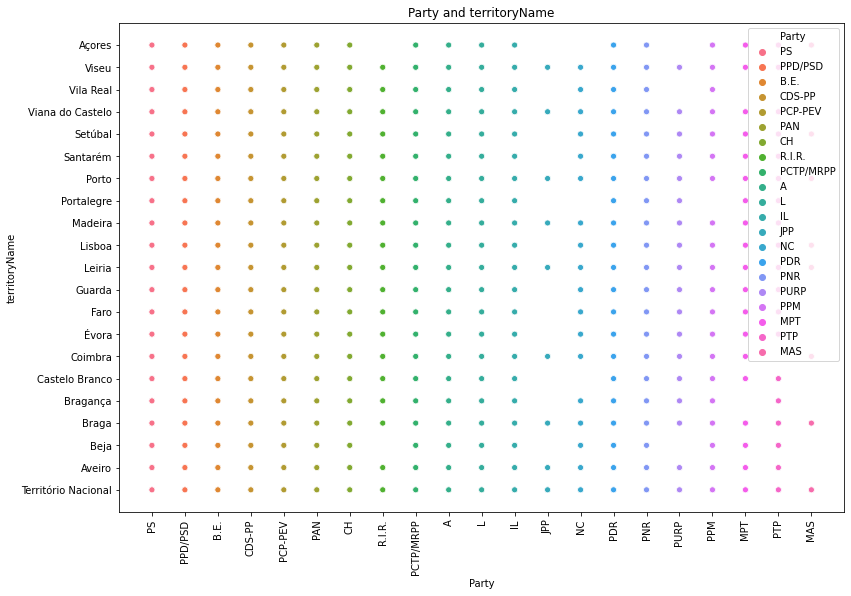

In [21]:
plt.figure(figsize=(13,9))
plt.xlabel('Party')
plt.ylabel('territoryName')
plt.title('Party and territoryName')
sns.scatterplot(x='Party',y='territoryName',hue='Party',data=df)
plt.xticks(rotation=90)

we can see in this scatter graph Party with respect to territory

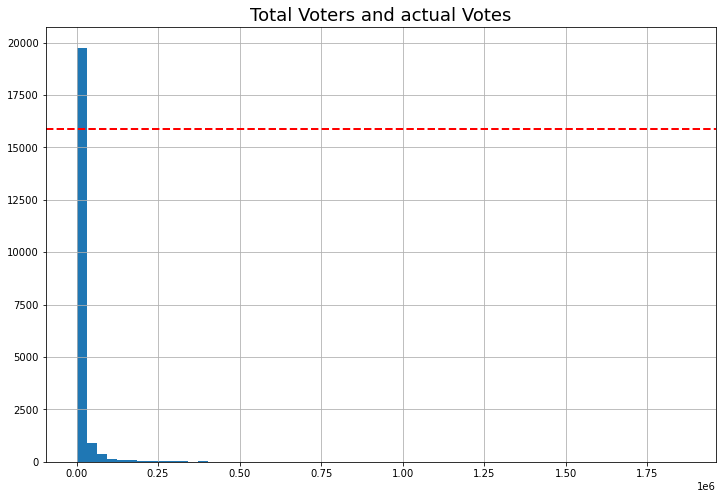

In [22]:
plt.figure(figsize=(12,8))
totalVoterss=df['Votes'].hist(bins=60)
mean_value=np.mean(df['Votes'])
plt.axhline(mean_value,color='r',linestyle='dashed',linewidth=2)
plt.title('Total Voters and actual Votes', fontsize=18)
plt.show()

we can see in this scatter graph actual with respect to party and mean of it

In [23]:
df.Party.value_counts()

PCP-PEV      1127
CH           1127
A            1127
PNR          1127
CDS-PP       1127
PS           1127
PDR          1127
B.E.         1127
IL           1127
L            1127
PCTP/MRPP    1127
PAN          1127
PPD/PSD      1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

In [24]:
PartyPercentage_pivot = \
df.pivot_table(index="Party", values="Percentage", aggfunc=np.median)

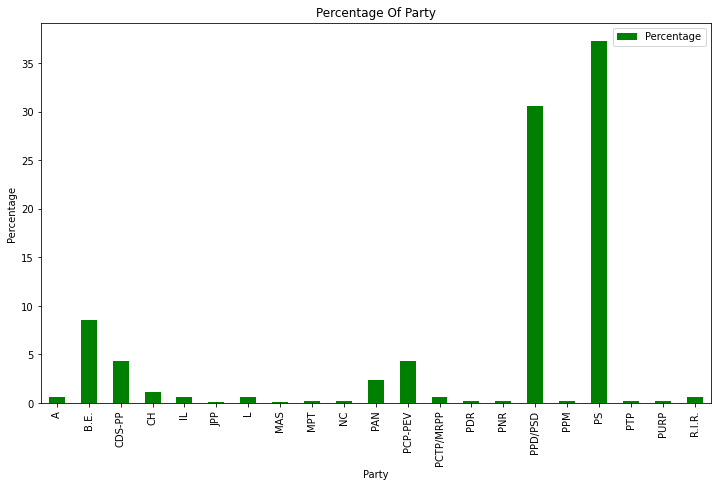

In [25]:
PartyPercentage_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.title('Percentage Of Party')
plt.xticks(rotation=90)
plt.show()

we can see here percentage wise Party contrybuted

In [26]:
TerritoryPercentage_pivot = \
df.pivot_table(index="territoryName", values="Percentage", aggfunc=np.median)

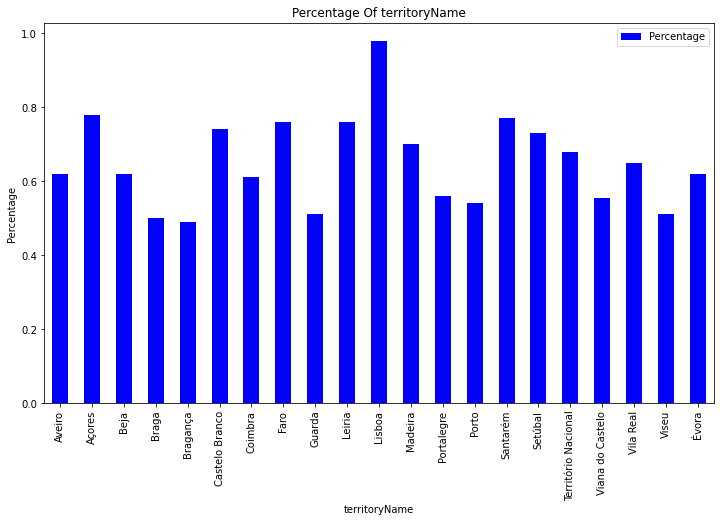

In [27]:
TerritoryPercentage_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('territoryName')
plt.ylabel('Percentage')
plt.title('Percentage Of territoryName')
plt.xticks(rotation=90)
plt.show()

we can see here percentage wise Territory 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

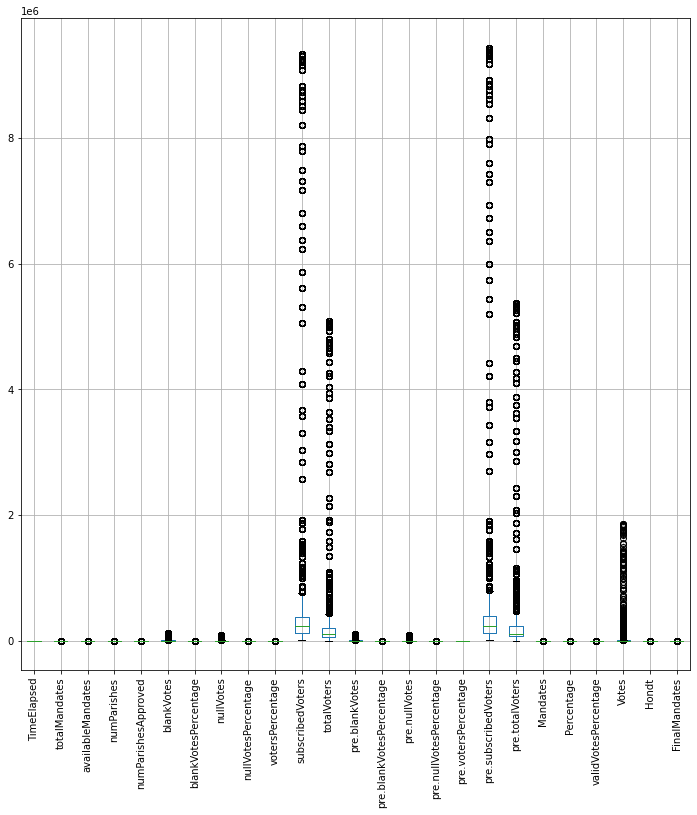

In [28]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

we can easly locate outliers here

In [29]:
df.skew()

TimeElapsed                 -0.005496
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float64

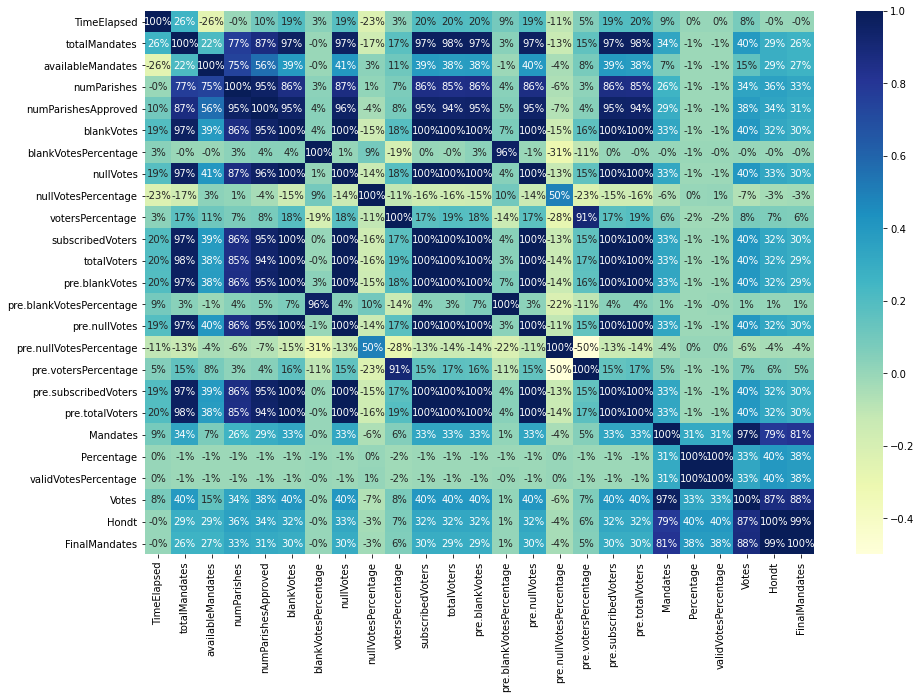

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmax=1,cmap='YlGnBu',annot=True,fmt='.0%')
plt.show()

we can see here positive and negative correlation off all attributes

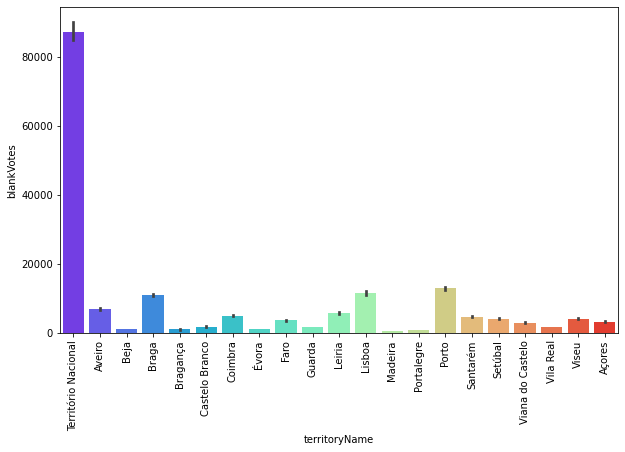

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='territoryName',y='blankVotes',data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.show()


we can see Blank volte per territory here

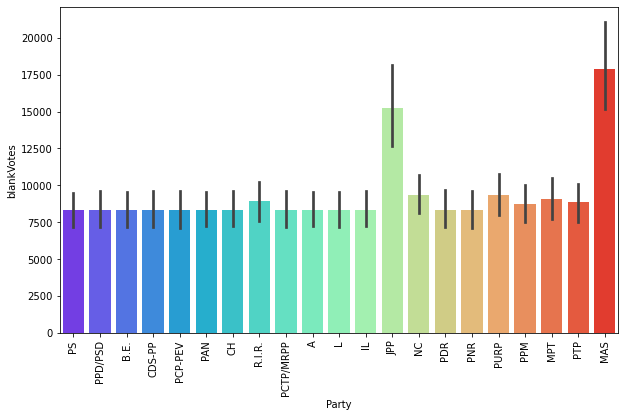

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Party',y='blankVotes',data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.show()


we can see Blank volte per party here

In [33]:
df

TimeElapsed                time        territoryName  totalMandates  \
0                0 2019-10-06 20:10:02  Território Nacional              0   
1                0 2019-10-06 20:10:02  Território Nacional              0   
2                0 2019-10-06 20:10:02  Território Nacional              0   
3                0 2019-10-06 20:10:02  Território Nacional              0   
4                0 2019-10-06 20:10:02  Território Nacional              0   
...            ...                 ...                  ...            ...   
21638          265 2019-10-07 00:35:01                Viseu              8   
21639          265 2019-10-07 00:35:01                Viseu              8   
21640          265 2019-10-07 00:35:01                Viseu              8   
21641          265 2019-10-07 00:35:01                Viseu              8   
21642          265 2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...     ...    ... 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [35]:
label=LabelEncoder()
varib = ['time','territoryName','Party']
for i in varib:
    df[i]=label.fit_transform(df[i])

We are using LabelEncoder for numeric data which will help us to make our model

In [36]:
df

TimeElapsed  time  territoryName  totalMandates  availableMandates  \
0                0     0             16              0                226   
1                0     0             16              0                226   
2                0     0             16              0                226   
3                0     0             16              0                226   
4                0     0             16              0                226   
...            ...   ...            ...            ...                ...   
21638          265    53             19              8                  0   
21639          265    53             19              8                  0   
21640          265    53             19              8                  0   
21641          265    53             19              8                  0   
21642          265    53             19              8                  0   

       numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0             3092                 1081        9652                  2.50   
1             3092                 1081        9652                  2.50   
2             3092                 1081        9652                  2.50   
3             3092                 1081        9652                  2.50   
4             3092                 1081        9652                  2.50   
...            ...                  ...         ...                   ...   
21638          277                  277        4995                  2.81   
21639          277                  277        4995                  2.81   
21640          277                  277        4995                  2.81   
21641          277                  277        4995                  2.81   
21642          277                  277        4995                  2.81   

       nullVotes  ...  pre.votersPercentage  pre.subscribedVoters  \
0           8874  ...                 52.66                813743   
1           8874  ...                 52.66                813743   
2           8874  ...                 52.66                813743   
3           8874  ...                 52.66                813743   
4           8874  ...                 52.66                813743   
...          ...  ...                   ...                   ...   
21638       3700  ...                 51.28                371931   
21639       3700  ...                 51.28                371931   
21640       3700  ...                 51.28                371931   
21641       3700  ...                 51.28                371931   
21642       3700  ...                 51.28                371931   

       pre.totalVoters  Party  Mandates  Percentage  validVotesPercentage  \
0               428546     17         0       38.29                 40.22   
1               428546     15         0       33.28                 34.95   
2               428546      1         0        6.81                  7.15   
3               428546      2         0        4.90                  5.14   
4               428546     11         0        4.59                  4.83   
...                ...    ...       ...         ...                   ...   
21638           190712      9         0        0.19                  0.20   
21639           190712     14         0        0.18                  0.19   
21640           190712      8         0        0.14                  0.15   
21641           190712     18         0        0.13                  0.14   
21642           190712      5         0        0.07                  0.07   

        Votes  Hondt  FinalMandates  
0      147993     94            106  
1      128624     81             77  
2       26307     16             19  
3       18923     12              5  
4       17757     11             12  
...       ...    ...            ...  
21638     332      0              0  
21639     326      0              0  
21640     256      0              0  
21641     239      0   

In [37]:
df.skew()

TimeElapsed                 -0.005496
time                        -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt       

In [38]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

we treated skewness here for our data

In [39]:
df.skew()

TimeElapsed                -0.005496
time                       -0.005496
territoryName              -0.025884
totalMandates               0.673353
availableMandates           0.739482
numParishes                 1.724389
numParishesApproved         0.363008
blankVotes                 -0.132151
blankVotesPercentage        0.069627
nullVotes                  -0.033397
nullVotesPercentage         0.545046
votersPercentage           -1.158029
subscribedVoters            0.019051
totalVoters                 0.091477
pre.blankVotes             -0.043120
pre.blankVotesPercentage    0.021609
pre.nullVotes              -0.019415
pre.nullVotesPercentage     0.786357
pre.votersPercentage       -0.779289
pre.subscribedVoters        0.021921
pre.totalVoters             0.094050
Party                      -0.083536
Mandates                    4.368206
Percentage                  1.416849
validVotesPercentage        1.404150
Votes                       0.367201
Hondt                       3.093717
F

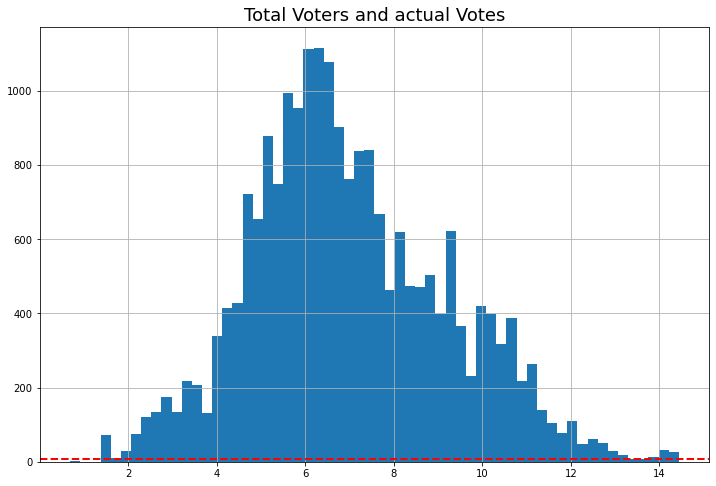

In [40]:
plt.figure(figsize=(12,8))
totalVoterss=df['Votes'].hist(bins=60)
mean_value=np.mean(df['Votes'])
plt.axhline(mean_value,color='r',linestyle='dashed',linewidth=2)
plt.title('Total Voters and actual Votes', fontsize=18)
plt.show()

here we can see again actual votes and toatal voters and mean of votes

In [41]:
x = df.drop('TimeElapsed', axis=1)
x = df.drop('time', axis=1)
x = df.drop('territoryName', axis=1)
x = df.drop('Party', axis=1)
x = df.drop('FinalMandates', axis=1)

df['FinalMandates']= df['FinalMandates'].astype('category')
y = df['FinalMandates']

In [42]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)
x.shape

(21643, 27)

We split data here but before that we also drop some columns which are not performing any significant role for our models

In [43]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(alpha=.001),Ridge(alpha=.001),KNeighborsRegressor(),DecisionTreeRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(r2_score(y_test,predm))
    print(explained_variance_score(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 LinearRegression() is :
0.9794208461121369
0.9794304307381241
0.037505889912907195
0.008462560212330328
0.008462560212330328


 Score = 
 Lasso(alpha=0.001) is :
0.9786041790055038
0.9786103265220683
0.03756521626444196
0.008798390081768605
0.008798390081768605


 Score = 
 Ridge(alpha=0.001) is :
0.9794186901544891
0.9794281873096495
0.03749618126758932
0.00846344678529191
0.00846344678529191


 Score = 
 KNeighborsRegressor() is :
0.8432037083594526
0.8452418316248013
0.10637437121169899
0.06447777524326663
0.06447777524326663


 Score = 
 DecisionTreeRegressor() is :
0.9996788833796804
0.9996790450140137
0.00025781248014360305
0.00013204958519883527
0.00013204958519883527


 Score = 
 RandomForestRegressor() is :
0.9995834260150944
0.9995836132468787
0.0009085604473569204
0.0001713035652176431
0.0001713035652176431


 Score = 
 AdaBoostRegressor() is :
0.9764294266937013
0.9780231997527981
0.049751305369955465
0.009692691785610151
0.009692691785610151


 Score = 
 Gradien

here we can see that DecisionTreeRegressor is performing well with given dataset

In [46]:
model=[LinearRegression(), Lasso(alpha=1),Ridge(alpha=1),KNeighborsRegressor(),DecisionTreeRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model',m)
    print('Score',score)
    print('meanscore',score.mean())
    print('Standard Deviations:',score.std())
    print('**************************************')
    print('\n')

Model LinearRegression()
Score [0.95005322 0.95807965 0.97007554 0.98137049 0.98801247 0.9907243
 0.99110011 0.98831776 0.98912895 0.98878898]
meanscore 0.9795651471421541
Standard Deviations: 0.014170341452542184
**************************************


Model Lasso(alpha=1)
Score [-1.83030969e-04 -4.72400140e-05 -1.19339645e-04 -2.42592378e-06
 -2.52164052e-05 -1.65685218e-04 -1.08263647e-05 -1.38501547e-05
 -1.97221569e-05 -4.66752156e-05]
meanscore -6.340120681413985e-05
Standard Deviations: 6.383313822301575e-05
**************************************


Model Ridge(alpha=1)
Score [0.9493776  0.95774827 0.97019771 0.98128858 0.98795157 0.99067368
 0.99101736 0.98825694 0.98914889 0.98898012]
meanscore 0.9794640721029948
Standard Deviations: 0.014348527453622051
**************************************


Model KNeighborsRegressor()
Score [0.59193992 0.65434397 0.77212777 0.74509059 0.8383674  0.83956649
 0.84741832 0.8471404  0.82273817 0.80343364]
meanscore 0.7762166677306603
Standard 

In [44]:
import joblib
joblib.dump(DecisionTreeRegressor(),'M20_P19_ElectionData.obj')

['M20_P19_ElectionData.obj']